In [1]:
import numpy as np
import matplotlib.pyplot as plt
from swim import harmonic, double_well, simple_mc

np.set_printoptions(precision=5)

#### Take a look at our double well potential

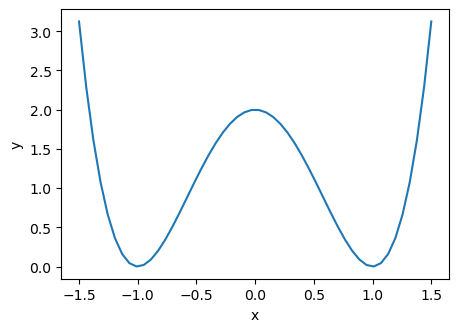

In [2]:
dw = double_well()
dw.param = {'B':2, 'x0':1}

x_arr = np.linspace(-1.5, 1.5, 50)
y_arr = dw.act(x_arr)

fig, ax = plt.subplots(figsize=(5,3.5), nrows=1, ncols=1)
ax.plot(x_arr, y_arr)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

#### Generate the centers of windows for umbrella sampling

In [3]:
centers = np.arange(-14, 18, 2)*0.1

#### Umbrella simulations

In [4]:
def replica(idx, x0):
    """
    Generate a replica of umbrella sampling simulations.
    """
    dw = double_well()
    dw.param = {'B':2., 'x0':1.}

    hm = harmonic()
    hm.param = {'K':10., 'x0':x0}

    mc = simple_mc(seed=45932)
    mc.set_param(movesize=0.05, kT=0.1)
    mc.set_init_x(x0)
    
    mc.external_pe = [dw, hm]
    mc.run(int(1e6))
    
    np.savetxt('./DATA_wham/umbrella_{}'.format(idx), np.array(mc.traj[::100]))

for i, center in enumerate(centers):
    replica(i, center)

#### Create metadata

In [5]:
with open('./wham/wham/metadata', 'w') as f:
    for idx, center in enumerate(centers):
        line = '/Users/lina492375qw1188/Desktop/mc_umbrella/DATA_wham/umbrella_{} {:2f} 10.\n'.format(idx, center)
        f.write(line)

#### Plotting the umbrella simulations with our double well potential

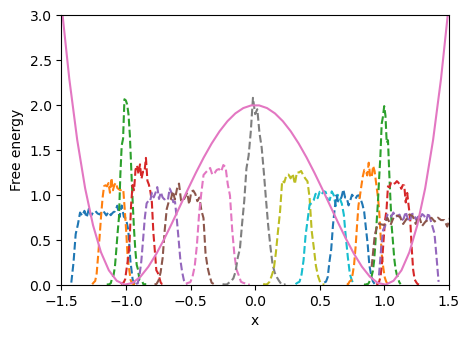

In [6]:
fig, ax = plt.subplots(figsize=(5,3.5), nrows=1, ncols=1)

for idx in range(len(centers)):
    step, x = np.loadtxt('./DATA_wham/umbrella_{}'.format(idx), unpack=True)
    hist = np.histogram(x, bins=30)
    prob = hist[0]/np.sum(hist[0])
    mids = 0.5*(hist[1][:-1]+hist[1][1:])
    
    ax.plot(mids, prob*20, '--')
ax.plot(x_arr, y_arr)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(0, 3)

ax.set_xlabel('x')
ax.set_ylabel('Free energy')
plt.show()